In [ ]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.

In [ ]:
#!pip install undetected-chromedriver

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#from selenium.webdriver import Chrome
from selenium import webdriver
#from selenium.webdriver.chrome.service import Service
import pandas as pd
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
import time
from tqdm import tqdm
from google.colab import drive

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("--disable-blink-features")
chrome_options.add_argument("--disable-extensions")
chrome_options.add_experimental_option('useAutomationExtension', False)
chrome_options.add_experimental_option("excludeSwitches", ["enable-automation"])

chrome_options.add_argument("--disable-blink-features=AutomationControlled")


In [ ]:
url = 'https://www.imdb.com/search/title/?title_type=feature&sort=boxoffice_gross_us,desc'

##Парсим для одного фильма на странице

In [ ]:
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver.implicitly_wait(2)
driver.get(url)
#time.sleep(0.5)
driver.switch_to.default_content()
driver.switch_to.parent_frame()
time.sleep(0.1)
et = driver.find_element(By.CLASS_NAME, 'lister-item-content')
title = et.find_element(By.TAG_NAME, 'a')
print(title.text)
ye = et.find_element(By.CLASS_NAME, 'lister-item-year')
year = ye.text.replace('(', '')
year = year.replace(')', '')
print(year)
time.sleep(0.1)
dur = et.find_element(By.CLASS_NAME, 'runtime')
duration = dur.text.replace(' min', '')
print(duration)
certificate = et.find_element(By.CLASS_NAME, 'certificate')
print(certificate.text)
genre = et.find_element(By.CLASS_NAME, 'genre')
g_string = genre.text
genresA = g_string.split( ", " )
print(genresA)
time.sleep(0.1)
rating_IMDB = et.find_element(By.TAG_NAME, 'strong')
print(rating_IMDB.text)
time.sleep(0.1)
rating_meta = et.find_element(By.CLASS_NAME, 'metascore')
print(rating_meta.text)
time.sleep(0.1)
nv = et.find_elements(By.NAME, 'nv')
print(nv[0].get_attribute('data-value'))
grosses = nv[1].get_attribute('data-value').replace(',', '')
print(grosses)
time.sleep(0.1)

<ipython-input-61-e91875a48676>:1: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)


Star Wars: Episode VII - The Force Awakens
2015
138
PG-13
['Action', 'Adventure', 'Sci-Fi']
7.8
80
930978
936662225


##Парсим в цикле для скольки хотим фильмов со страницы
Warning: выполняется около 2 часов

In [ ]:
df = pd.DataFrame({'id': [], 'title': [], 'year': [], 'duration': [], 'certificate': [], 'genre1': [], 'genre2': [], 'genre3': [], 'rate_IMGB': [], 'rate_meta': [], 'votes': [], 'grosses(US)': [], 'budget': [], 'wwGross': [], 'month': []})
skipped = 0

In [ ]:
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver.implicitly_wait(0.3)
count = 8000
st = 1
skipped += skip
skip = 0
for i in tqdm(range(st, count, 50)):
  if i > 1:
    url = 'https://www.imdb.com/search/title/?title_type=feature&sort=boxoffice_gross_us,desc&start='+str(i)+'&ref_=adv_nxt'
  else:
    url = 'https://www.imdb.com/search/title/?title_type=feature&sort=boxoffice_gross_us,desc'
  j = 0
  driver.get(url)
  driver.switch_to.default_content()
  driver.switch_to.parent_frame()
  time.sleep(0.07)
  movies = driver.find_elements(By.CLASS_NAME, 'lister-item-content')
  #print(len(et))
  for et in movies:
    
    title = et.find_element(By.TAG_NAME, 'a')
    print(i+j, title.text)
    ye = et.find_element(By.CLASS_NAME, 'lister-item-year')
    year = ye.text.replace('(', '')
    year = year.replace(')', '')
    year = year.replace('I', '')
    year = year.replace(' ', '')
    year = year.replace('V', '')
    year = year.replace('X', '')
    year = year.replace('C', '')
    year = year.replace('M', '')
    year = year.replace('L', '')
    #print(year)
    ##time.sleep(0.05)
    try:
      dur = et.find_element(By.CLASS_NAME, 'runtime')
    except Exception:
      skip += 1
      continue
    else:
      duration = dur.text.replace(' min', '')
    #print(duration)

    
    try:
      certificate = et.find_element(By.CLASS_NAME, 'certificate')
    except Exception:
      cert = 'None'
    else:
      cert = certificate.text
    #print(certificate.text)

    genre = et.find_element(By.CLASS_NAME, 'genre')
    g_string = genre.text
    genresA = g_string.split( ", " )
    #print(genresA)
    time.sleep(0.01)
    try:
      rating_IMDB = et.find_element(By.TAG_NAME, 'strong')
    except Exception:
      IMDB = 0
      skip += 1
      continue
    else:
      IMDB = float(rating_IMDB.text)
    #print(rating_IMDB.text)
    #time.sleep(0.1)
    try:
      rating_meta = et.find_element(By.CLASS_NAME, 'metascore')
    except Exception:
      meta = 0
    else:
      meta = int(rating_meta.text)

    #print(meta)
    #time.sleep(0.1)
    nv = et.find_elements(By.NAME, 'nv')
    #print(nv[0].get_attribute('data-value'))
    grosses = nv[1].get_attribute('data-value').replace(',', '')
    #print(grosses)
    ##time.sleep(0.05)
    if (i+j) > (len(df) + skipped):
      df = df.append({'id': i + j, 'title': title.text, 'year': int(year), 'duration': int(duration), 'certificate': cert, 'genre1': genresA[0], 'genre2': genresA[1] if len(genresA) > 1 else 0, 'genre3': genresA[2] if len(genresA) > 2 else 0, 'rate_IMGB': IMDB, 'rate_meta': meta, 'votes': int(nv[0].get_attribute('data-value')), 'grosses(US)': int(grosses), 'budget': None, 'wwGross': None, 'month': None}, ignore_index = True)
      print("Added")
    j += 1


#df.sample

drive.mount('/content/drive')
path = '/content/drive/My Drive/movies/MovieData8k.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)

##Добавляем в датафрейм новые столбцы 
(в этом коде слишком нелинейное повествование.....)
dfc это по сути тот же df, отчего в df появились новые столбцы, которые заполняются нанами выше...... но само создание dfc уже стёрто из кода, и если запустить его просто по порядку, ничего не будет работать, а это сообщение вообще надо было выше
##короче
я всё исправил, теперь код линейный вроде

но нахуя нужен dfc - непонятно, но раз есть, пусть будет

In [ ]:
dfc = df

##Один фильм с новой страницы

In [ ]:

driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver.implicitly_wait(0.3)
url = 'https://www.the-numbers.com/movie/budgets/all'
driver.get(url)
driver.switch_to.default_content()
driver.switch_to.parent_frame()
movies = driver.find_elements(By.TAG_NAME, 'tr')
print(len(movies))
del movies[0]

inf = movies[0].find_elements(By.TAG_NAME, 'a')
Btitle = inf[1].text
print(Btitle)

date = inf[0].text.split( " " )
print(date[0], date[2])
Bmonth = date[0]
Byear = int(date[2])
money = movies[0].find_elements(By.CLASS_NAME, 'data')
del money[0]
budget = money[0].text
budget = budget.replace(' ', '')
budget = budget.replace('$', '')
budget = budget.replace(',', '')
budget = int(budget)
wwG = money[2].text
wwG = wwG.replace(' ', '')
wwG = wwG.replace('$', '')
wwG = wwG.replace(',', '')
wwG = int(wwG)
print(budget, wwG)
driver.close()

<ipython-input-163-4a582cf22b19>:1: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)


101
Avengers: Endgame
Apr 2019
400000000 2797732053


In [ ]:
print(Btitle)
if Btitle in dfc.values :
    print("\n YEA")
#dfc.loc[dfc['title'] == Btitle]

Avengers: Endgame

This value exists in Dataframe


##Функция для перевода месяца в численный формат

In [ ]:
def mon_to_num(m):
  if m == 'Jan':
    return 1
  elif m == 'Feb':
    return 2
  elif m == 'Mar':
    return 3
  elif m == 'Apr':
    return 4
  elif m == 'May':
    return 5
  elif m == 'Jun':
    return 6
  elif m == 'Jul':
    return 7
  elif m == 'Aug':
    return 8
  elif m == 'Sep':
    return 9
  elif m == 'Oct':
    return 10
  elif m == 'Nov':
    return 11
  elif m == 'Dec':
    return 12
  else:
    return None


##Парсим в цикле 6400 фильмов, проверяем наличие данного фильма в нашем датафрейме, если присутствует, то дополняем информацию о нём
Warning: выполняется около 40 минут

In [ ]:
from tables.unimplemented import Unknown
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
driver.implicitly_wait(0.3)
count = 6400
st = 1
for i in tqdm(range(st, count, 100)):
  if i > 1:
    url = 'https://www.the-numbers.com/movie/budgets/all/'+str(i)
  else:
    url = 'https://www.the-numbers.com/movie/budgets/all'
  j = 0
  driver.get(url)
  driver.switch_to.default_content()
  driver.switch_to.parent_frame()
  time.sleep(0.07)
  movies = driver.find_elements(By.TAG_NAME, 'tr')
  #print(len(movies))
  del movies[0]

  for et in movies:
    

    inf = et.find_elements(By.TAG_NAME, 'a')
    Btitle = inf[1].text
    print("\n", i+j, Btitle)
    if Btitle in dfc.values :
      print("YEA")
    if inf[0].text != 'Unknown':
      date = inf[0].text.split( " " )
      #print(date[0], date[2])
      if len(date) > 2:
        Bmonth = date[0]
        #Byear = date[2]
        dfc.loc[dfc['title'] == Btitle, 'month'] = mon_to_num(Bmonth)
        
    ##time.sleep(0.05)
    money = et.find_elements(By.CLASS_NAME, 'data')
    del money[0]
    budget = money[0].text
    budget = budget.replace(' ', '')
    budget = budget.replace('$', '')
    budget = budget.replace(',', '')
    wwG = money[2].text
    wwG = wwG.replace(' ', '')
    wwG = wwG.replace('$', '')
    wwG = wwG.replace(',', '')
    print(budget, wwG)
    ##time.sleep(0.05)
    dfc.loc[dfc['title'] == Btitle, 'budget'] = int(budget)
    dfc.loc[dfc['title'] == Btitle, 'wwGross'] = int(wwG)
    

    j += 1



drive.mount('/content/drive')
path = '/content/drive/My Drive/movies/BMovieData4k.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  dfc.to_csv(f)
#dfc

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import sklearn
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split #для разделения выборки на обучающую и тестовую
from sklearn import preprocessing #для нормировки
from sklearn.tree import DecisionTreeRegressor #для определения вклада в решение разных признаков
from sklearn.linear_model import LinearRegression #для линейной регрессии
from sklearn import linear_model #не помню
from tqdm.notebook import tqdm #для красивой полоски у циклов
from sklearn.model_selection import KFold, ParameterGrid, LeaveOneOut
from sklearn.svm import SVR
from scipy.spatial.distance import cdist

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/movies/MovieData8k.csv')
dataset

,Unnamed: 0,id,title,year,duration,certificate,genre1,genre2,genre3,rate_IMGB,rate_meta,votes,grosses(US),budget,wwGross,month
0,0,1.0,Star Wars: Episode VII - The Force Awakens,2015.0,138.0,PG-13,Action,Adventure,Sci-Fi,7.8,80.0,930990.0,936662225.0,NaN,NaN,NaN
1,1,2.0,Avengers: Endgame,2019.0,181.0,PG-13,Action,Adventure,Drama,8.4,78.0,1126110.0,858373000.0,400000000.0,2.797732e+09,4.0
2,2,3.0,Spider-Man: No Way Home,2021.0,148.0,PG-13,Action,Adventure,Fantasy,8.3,71.0,750804.0,804747988.0,200000000.0,1.910042e+09,12.0
3,3,4.0,Avatar,2009.0,162.0,PG-13,Action,Adventure,Fantasy,7.8,83.0,1264399.0,760507625.0,237000000.0,2.899384e+09,12.0
4,4,5.0,Black Panther,2018.0,134.0,PG-13,Action,Adventure,Sci-Fi,7.3,88.0,771756.0,700059566.0,200000000.0,1.336494e+09,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7988,7988,7996.0,Secret of the Incas,1954.0,100.0,Approved,Action,Adventure,0,6.0,0.0,1634.0,1400000.0,NaN,NaN,NaN
7989,7989,7997.0,Riding Shotgun,1954.0,73.0,Passed,Western,0,0,6.4,0.0,1251.0,1400000.0,NaN,NaN,NaN
7990,7990,7998.0,It Should Happen to You,1954.0,86.0,Approved,Comedy,Music,Romance,7.2,0.0,4106.0,1400000.0,NaN,NaN,NaN
7991,7991,7999.0,The Boy from Oklahoma,1954.0,87.0,Approved,Western,0,0,6.0,0.0,424.0,1400000.0,NaN,NaN,NaN


In [ ]:
#wtf we don't have budget data for star wars here lol
dataset.loc[dataset['title'] == 'Star Wars: Episode VII - The Force Awakens', 'budget'] = 245000000
dataset.loc[dataset['title'] == 'Star Wars: Episode VII - The Force Awakens', 'wwGross'] = 2069521700
dataset.loc[dataset['title'] == 'Star Wars: Episode VII - The Force Awakens', 'month'] = 12
#now we have :)
dataset

,Unnamed: 0,id,title,year,duration,certificate,genre1,genre2,genre3,rate_IMGB,rate_meta,votes,grosses(US),budget,wwGross,month
0,0,1.0,Star Wars: Episode VII - The Force Awakens,2015.0,138.0,PG-13,Action,Adventure,Sci-Fi,7.8,80.0,930990.0,936662225.0,245000000.0,2.069522e+09,12.0
1,1,2.0,Avengers: Endgame,2019.0,181.0,PG-13,Action,Adventure,Drama,8.4,78.0,1126110.0,858373000.0,400000000.0,2.797732e+09,4.0
2,2,3.0,Spider-Man: No Way Home,2021.0,148.0,PG-13,Action,Adventure,Fantasy,8.3,71.0,750804.0,804747988.0,200000000.0,1.910042e+09,12.0
3,3,4.0,Avatar,2009.0,162.0,PG-13,Action,Adventure,Fantasy,7.8,83.0,1264399.0,760507625.0,237000000.0,2.899384e+09,12.0
4,4,5.0,Black Panther,2018.0,134.0,PG-13,Action,Adventure,Sci-Fi,7.3,88.0,771756.0,700059566.0,200000000.0,1.336494e+09,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7988,7988,7996.0,Secret of the Incas,1954.0,100.0,Approved,Action,Adventure,0,6.0,0.0,1634.0,1400000.0,NaN,NaN,NaN
7989,7989,7997.0,Riding Shotgun,1954.0,73.0,Passed,Western,0,0,6.4,0.0,1251.0,1400000.0,NaN,NaN,NaN
7990,7990,7998.0,It Should Happen to You,1954.0,86.0,Approved,Comedy,Music,Romance,7.2,0.0,4106.0,1400000.0,NaN,NaN,NaN
7991,7991,7999.0,The Boy from Oklahoma,1954.0,87.0,Approved,Western,0,0,6.0,0.0,424.0,1400000.0,NaN,NaN,NaN


##Посмотрим, на какую долю фильмов у нас есть данные о бюджете

In [ ]:
print(dataset.count()['budget'])
print(dataset.count()['budget']/len(dataset))


2754
0.34455148254722884


##Дальше будем использовать только фильмы со всеми данными

In [ ]:
from copy import deepcopy

In [ ]:
data_learn = deepcopy(dataset)
data_learn = data_learn.drop(['Unnamed: 0', 'id', 'title', 'certificate', 'genre1', 'genre2', 'genre3'], axis = 1)
data_learn = data_learn.dropna()
data_learn

,year,duration,rate_IMGB,rate_meta,votes,grosses(US),budget,wwGross,month
0,2015.0,138.0,7.8,80.0,930990.0,936662225.0,245000000.0,2.069522e+09,12.0
1,2019.0,181.0,8.4,78.0,1126110.0,858373000.0,400000000.0,2.797732e+09,4.0
2,2021.0,148.0,8.3,71.0,750804.0,804747988.0,200000000.0,1.910042e+09,12.0
3,2009.0,162.0,7.8,83.0,1264399.0,760507625.0,237000000.0,2.899384e+09,12.0
4,2018.0,134.0,7.3,88.0,771756.0,700059566.0,200000000.0,1.336494e+09,2.0
...,...,...,...,...,...,...,...,...,...
3991,2018.0,124.0,6.3,60.0,51336.0,16468499.0,25000000.0,4.848175e+07,12.0
3993,1999.0,109.0,5.0,29.0,15541.0,16459004.0,15000000.0,1.826086e+07,1.0
3995,1977.0,155.0,6.6,64.0,20313.0,16400000.0,14000000.0,1.380030e+07,6.0
3997,2012.0,138.0,7.1,86.0,176096.0,16377274.0,37500000.0,5.087913e+07,9.0


In [ ]:
data_learn2 = deepcopy(dataset)
data_learn2 = data_learn2.drop(['Unnamed: 0', 'id', 'title', 'certificate', 'genre1', 'genre2', 'genre3', 'grosses(US)'], axis = 1)
data_learn2 = data_learn2.dropna()
data_learn2

,year,duration,rate_IMGB,rate_meta,votes,budget,wwGross,month
0,2015.0,138.0,7.8,80.0,930990.0,245000000.0,2.069522e+09,12.0
1,2019.0,181.0,8.4,78.0,1126110.0,400000000.0,2.797732e+09,4.0
2,2021.0,148.0,8.3,71.0,750804.0,200000000.0,1.910042e+09,12.0
3,2009.0,162.0,7.8,83.0,1264399.0,237000000.0,2.899384e+09,12.0
4,2018.0,134.0,7.3,88.0,771756.0,200000000.0,1.336494e+09,2.0
...,...,...,...,...,...,...,...,...
3991,2018.0,124.0,6.3,60.0,51336.0,25000000.0,4.848175e+07,12.0
3993,1999.0,109.0,5.0,29.0,15541.0,15000000.0,1.826086e+07,1.0
3995,1977.0,155.0,6.6,64.0,20313.0,14000000.0,1.380030e+07,6.0
3997,2012.0,138.0,7.1,86.0,176096.0,37500000.0,5.087913e+07,9.0


##Теперь в нашем датасете только хорошие значения, все числовые, никаких налов, аналов, красота, можем делать уже мл приколы
##Нашим таргетом будет столбец с мировыми сборами - wwGross


In [ ]:
#target = data_learn['wwGross']
#data_learn = data_learn.drop('wwGross', axis = 1)

target2 = data_learn2['wwGross']
data_learn2 = data_learn2.drop('wwGross', axis = 1)


In [ ]:
target = pd.DataFrame(target)
target2 = pd.DataFrame(target2)
l = len(target)
n1 = 8
n2 = 7
l

2750

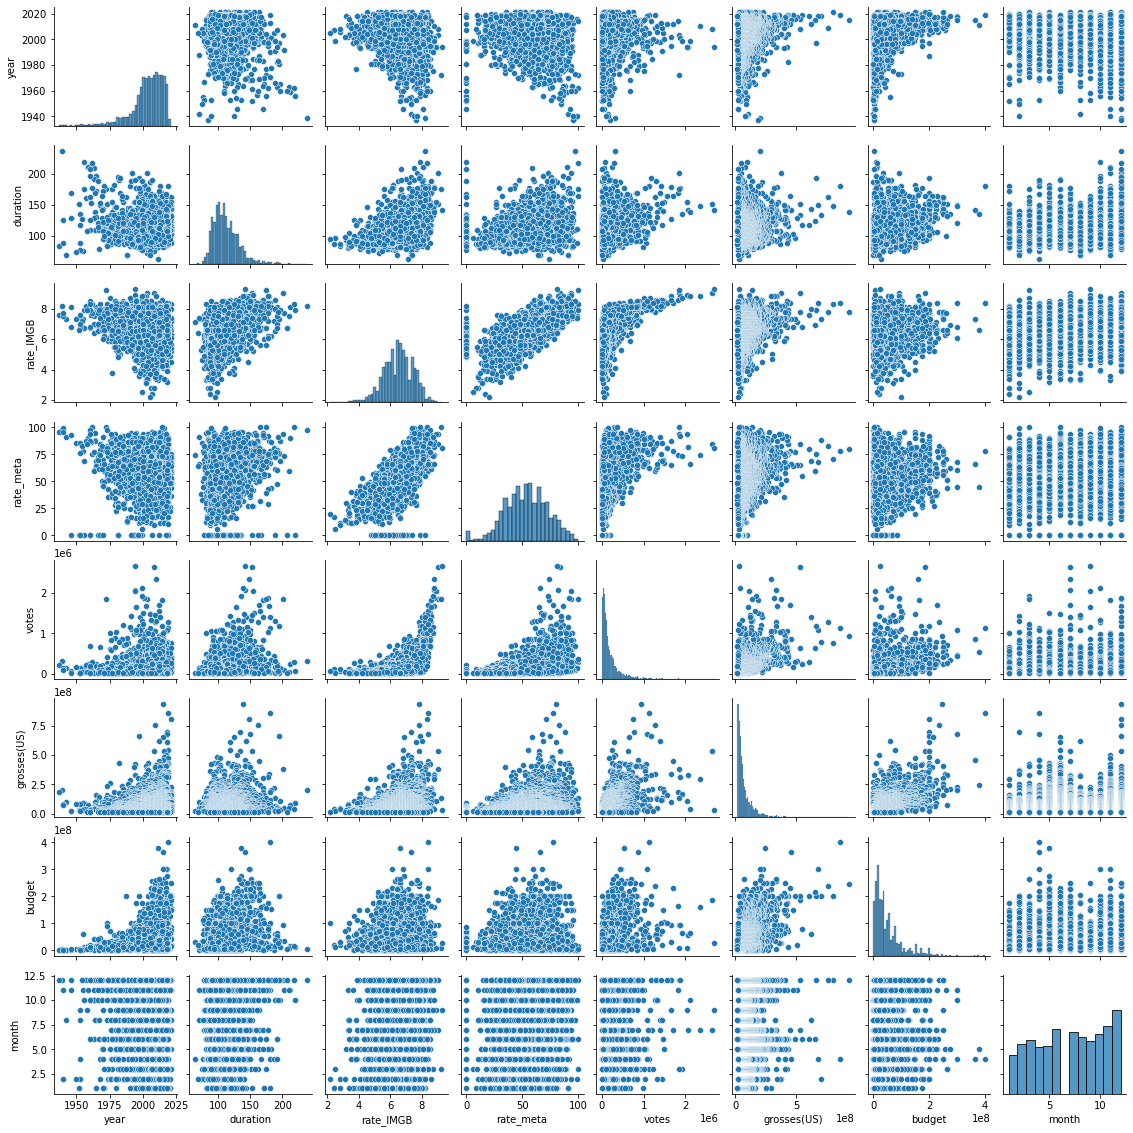

In [ ]:
sns.pairplot(data_learn, height=2)
plt.show()

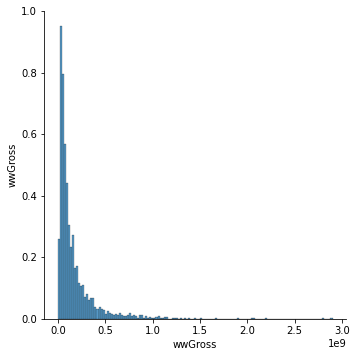

In [ ]:
sns.pairplot(target, height=5)
plt.show()

In [ ]:
data_learn

,year,duration,rate_IMGB,rate_meta,votes,grosses(US),budget,month
0,2015.0,138.0,7.8,80.0,930990.0,936662225.0,245000000.0,12.0
1,2019.0,181.0,8.4,78.0,1126110.0,858373000.0,400000000.0,4.0
2,2021.0,148.0,8.3,71.0,750804.0,804747988.0,200000000.0,12.0
3,2009.0,162.0,7.8,83.0,1264399.0,760507625.0,237000000.0,12.0
4,2018.0,134.0,7.3,88.0,771756.0,700059566.0,200000000.0,2.0
...,...,...,...,...,...,...,...,...
3991,2018.0,124.0,6.3,60.0,51336.0,16468499.0,25000000.0,12.0
3993,1999.0,109.0,5.0,29.0,15541.0,16459004.0,15000000.0,1.0
3995,1977.0,155.0,6.6,64.0,20313.0,16400000.0,14000000.0,6.0
3997,2012.0,138.0,7.1,86.0,176096.0,16377274.0,37500000.0,9.0


In [ ]:
clf = DecisionTreeRegressor(random_state=241)
clf.fit(data_learn, target)
importances = clf.feature_importances_
importances = importances*100
print('Вклад признаков в построение прогноза')
for i in range (0,8):
  print(i, ' - ' ,"%.2f" %  importances[i], '%')

Вклад признаков в построение прогноза
0  -  2.26 %
1  -  1.67 %
2  -  0.65 %
3  -  0.91 %
4  -  2.26 %
5  -  84.30 %
6  -  7.39 %
7  -  0.56 %


In [ ]:
clf = DecisionTreeRegressor(random_state=241)
clf.fit(data_learn2, target2)
importances = clf.feature_importances_
importances = importances*100
print('Вклад признаков в построение прогноза без сборов в сша')
for i in range (0,7):
  print(i, ' - ' ,"%.2f" %  importances[i], '%')

Вклад признаков в построение прогноза
0  -  7.47 %
1  -  3.91 %
2  -  3.36 %
3  -  3.48 %
4  -  31.96 %
5  -  47.06 %
6  -  2.75 %


##Дальше глянем, есть ли коррелирующие признаки

,year,duration,rate_IMGB,rate_meta,votes,grosses(US),budget,month
year,1.000000,-0.144974,-0.177405,-0.112117,0.069058,0.121969,0.292030,-0.098597
duration,-0.144974,1.000000,0.453509,0.305965,0.342178,0.220900,0.244024,0.199099
rate_IMGB,-0.177405,0.453509,1.000000,0.735383,0.564606,0.282786,0.053858,0.226180
rate_meta,-0.112117,0.305965,0.735383,1.000000,0.417216,0.254205,0.035122,0.208355
votes,0.069058,0.342178,0.564606,0.417216,1.000000,0.556075,0.333136,0.075807
grosses(US),0.121969,0.220900,0.282786,0.254205,0.556075,1.000000,0.559337,0.040272
budget,0.292030,0.244024,0.053858,0.035122,0.333136,0.559337,1.000000,0.021683
month,-0.098597,0.199099,0.226180,0.208355,0.075807,0.040272,0.021683,1.000000


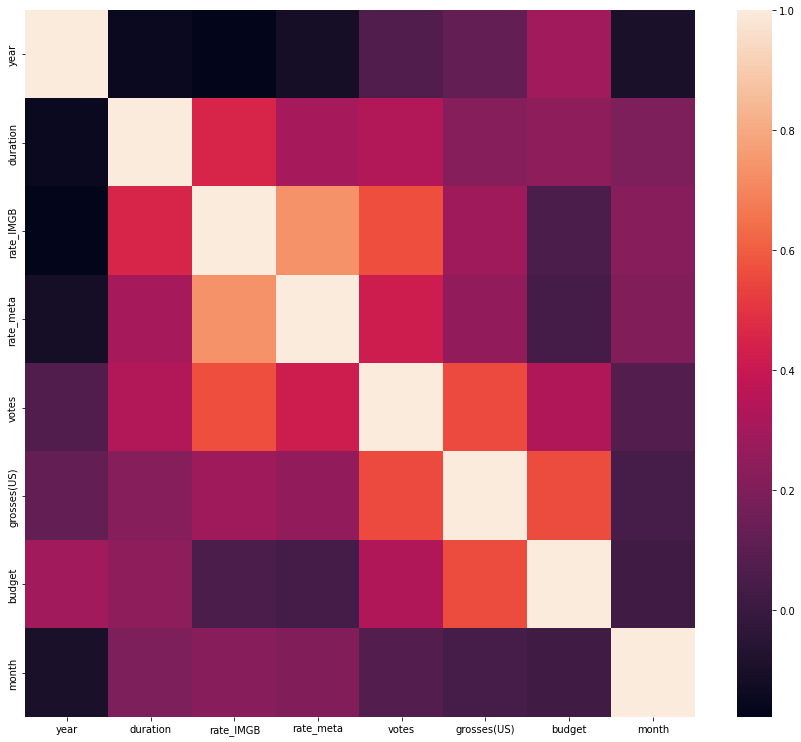

In [ ]:
matrix = data_learn.corr(method='pearson')
plt.figure(figsize=(15,13))
sns.heatmap(matrix, annot=False)
matrix

##Сначала сделаем для data_learn - где сборы в сша также являются признаком

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data_learn, target, test_size=0.5, random_state=0)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X = np.array(X_train)
y = np.array(Y_train)

ones_train = np.ones((int(l/2), 1))
ones_test = np.ones((int(l/2), 1))
X_test = np.append(X_test, ones_test, axis=1)
X = np.append(X, ones_train, axis=1) #добавляем как признак константу для случая смещённых относительно нуля данных или типа

In [ ]:
V, d, U = np.linalg.svd(X, full_matrices=False)
D = np.eye(len(d))*d
tau = 5
W = (U.T@D@np.linalg.inv(D**2 + tau*np.eye(len(D)))@V.T)@y

np.sqrt(np.linalg.norm(X_test@W - Y_test, 2)**2/len(Y_test))

80883495.7438254

In [ ]:
reg = LinearRegression(fit_intercept=False).fit(X, y)
w = reg.coef_
y_pred = reg.predict(X_test)

print("err norm:", np.sqrt(np.linalg.norm(y_pred - Y_test, 2)**2/len(Y_test)))
print("score is ", reg.score(X_test, Y_test))

err norm: 80745012.52433003
score is  0.8783493297168663


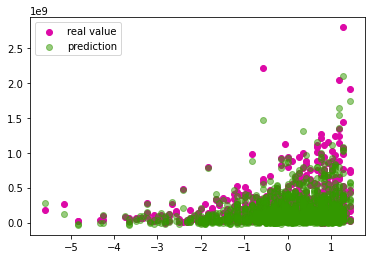

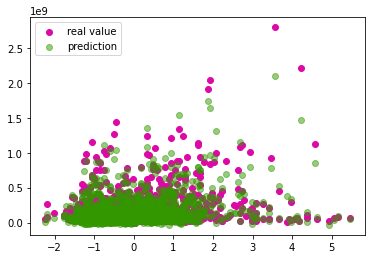

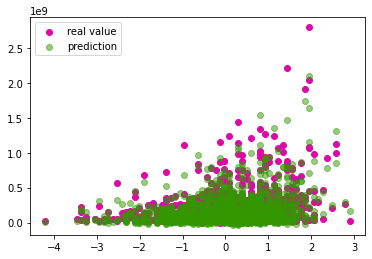

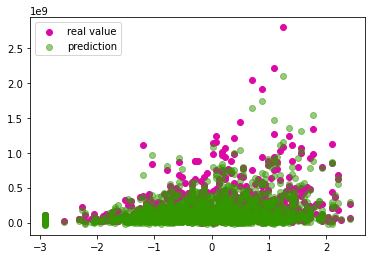

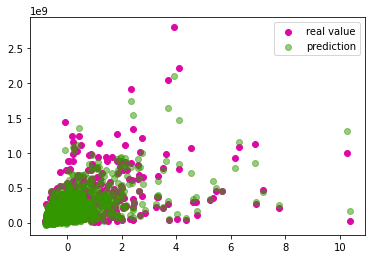

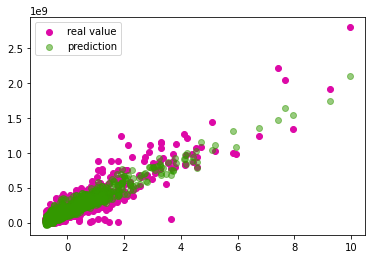

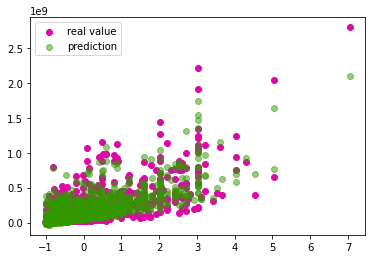

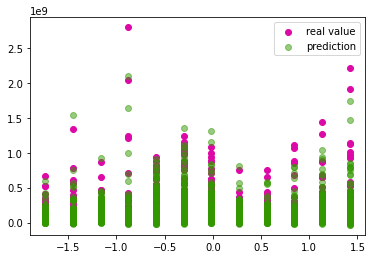

In [ ]:
#numfeat = 5
for numfeat in range(8):
  plt.scatter(X_test.T[numfeat], Y_test, c = '#dd09a7', label='real value')
  plt.scatter(X_test.T[numfeat], y_pred, c = '#339900', alpha = 0.5, label = 'prediction')
  #plt.grid()
  plt.legend(loc='best')
  plt.show()

##вообще довольно неплохо получилось, скор 0.8
ради прикола сделаем фичер дженерейшн

In [ ]:
import math
math.pow(7, 2)
math.

49.0

In [ ]:
data_learn
data_learn['budSqrt'] = data_learn.apply(lambda row: math.sqrt(row['budget']), axis = 1)
data_learn['d^2'] = data_learn.apply(lambda row: math.pow(row['duration']-120, 2), axis = 1)
data_learn['loggros'] = data_learn.apply(lambda row: math.log(row['grosses(US)']), axis = 1)
data_learn['arc'] = data_learn.apply(lambda row: math.asin(row['month']/12), axis = 1)
data_learn['expIMDB'] = data_learn.apply(lambda row: math.exp(row['rate_IMGB']), axis = 1)
data_learn['logMeta'] = data_learn.apply(lambda row: math.log(row['rate_meta']+1), axis = 1)
data_learn['year^2'] = data_learn.apply(lambda row: math.pow(row['year'], 2), axis = 1)
data_learn['rate^2'] = data_learn.apply(lambda row: math.pow(row['rate_IMGB'] + row['rate_meta'], 2), axis = 1)





data_learn

,year,duration,rate_IMGB,rate_meta,votes,grosses(US),budget,month,budSqrt,d^2,loggros,arc,expIMDB,logMeta,year^2,rate^2
0,2015.0,138.0,7.8,80.0,930990.0,936662225.0,245000000.0,12.0,15652.475842,324.0,20.657833,1.570796,2440.601978,4.394449,4060225.0,7708.84
1,2019.0,181.0,8.4,78.0,1126110.0,858373000.0,400000000.0,4.0,20000.000000,3721.0,20.570549,0.339837,4447.066748,4.369448,4076361.0,7464.96
2,2021.0,148.0,8.3,71.0,750804.0,804747988.0,200000000.0,12.0,14142.135624,784.0,20.506040,1.570796,4023.872394,4.276666,4084441.0,6288.49
3,2009.0,162.0,7.8,83.0,1264399.0,760507625.0,237000000.0,12.0,15394.804318,1764.0,20.449497,1.570796,2440.601978,4.430817,4036081.0,8244.64
4,2018.0,134.0,7.3,88.0,771756.0,700059566.0,200000000.0,2.0,14142.135624,196.0,20.366676,0.167448,1480.299928,4.488636,4072324.0,9082.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,2018.0,124.0,6.3,60.0,51336.0,16468499.0,25000000.0,12.0,5000.000000,16.0,16.616960,1.570796,544.571910,4.110874,4072324.0,4395.69
3993,1999.0,109.0,5.0,29.0,15541.0,16459004.0,15000000.0,1.0,3872.983346,121.0,16.616383,0.083430,148.413159,3.401197,3996001.0,1156.00
3995,1977.0,155.0,6.6,64.0,20313.0,16400000.0,14000000.0,6.0,3741.657387,1225.0,16.612792,0.523599,735.095189,4.174387,3908529.0,4984.36
3997,2012.0,138.0,7.1,86.0,176096.0,16377274.0,37500000.0,9.0,6123.724357,324.0,16.611405,0.848062,1211.967074,4.465908,4048144.0,8667.61


In [ ]:
n = 14
clf = DecisionTreeRegressor(random_state=241)
clf.fit(data_learn, target)
importances = clf.feature_importances_
importances = importances*100
print('Вклад признаков в построение прогноза')
for i in range (16):
  print(i, ' - ' ,"%.2f" %  importances[i], '%')

Вклад признаков в построение прогноза
0  -  1.01 %
1  -  0.74 %
2  -  0.25 %
3  -  0.51 %
4  -  1.13 %
5  -  78.19 %
6  -  1.94 %
7  -  0.40 %
8  -  4.91 %
9  -  1.81 %
10  -  6.42 %
11  -  0.37 %
12  -  0.57 %
13  -  0.21 %
14  -  1.14 %
15  -  0.42 %


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data_learn, target, test_size=0.5, random_state=0)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_test = np.array(X_test)
Y_test = np.array(Y_test)
X = np.array(X_train)
y = np.array(Y_train)

ones_train = np.ones((int(l/2), 1))
ones_test = np.ones((int(l/2), 1))
X_test = np.append(X_test, ones_test, axis=1)
X = np.append(X, ones_train, axis=1) #добавляем как признак константу для случая смещённых относительно нуля данных или типа

In [ ]:
reg = LinearRegression(fit_intercept=False).fit(X, y)
w = reg.coef_
y_pred = reg.predict(X_test)

print("err norm:", np.sqrt(np.linalg.norm(y_pred - Y_test, 2)**2/len(Y_test)))
print("score is ", reg.score(X_test, Y_test))

err norm: 78183001.57934274
score is  0.8859467216468782


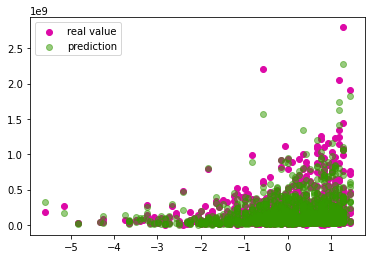

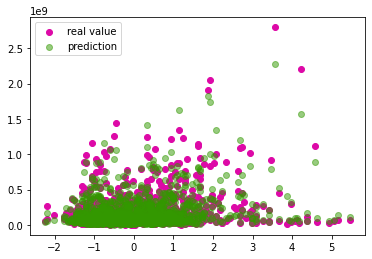

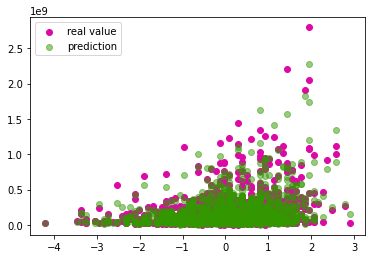

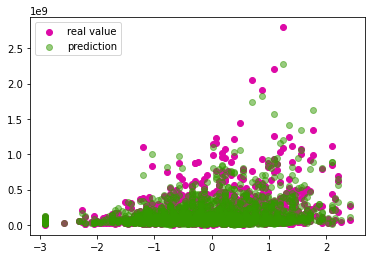

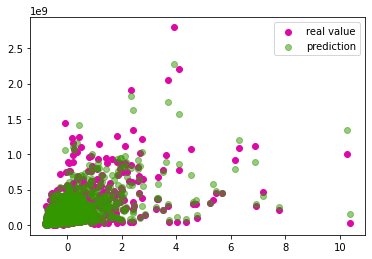

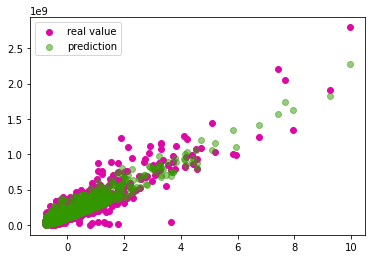

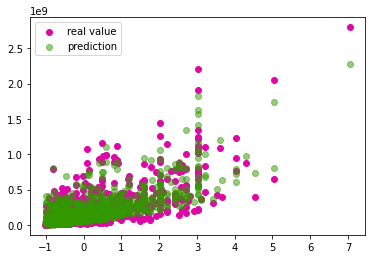

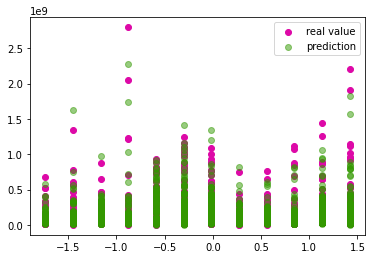

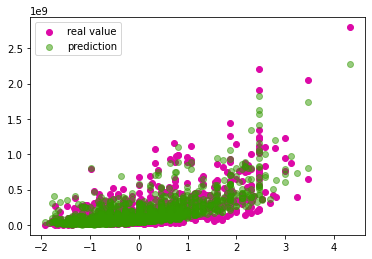

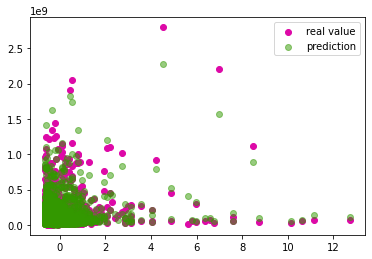

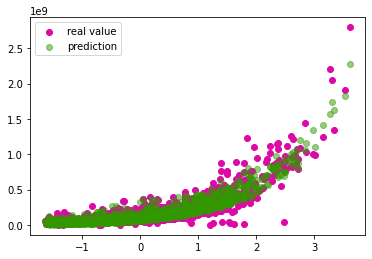

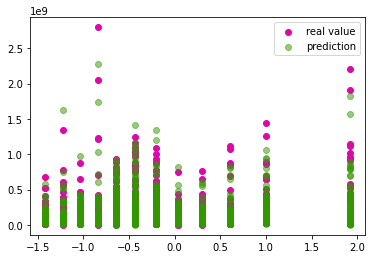

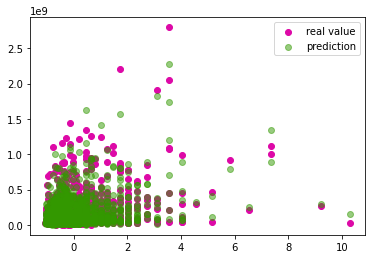

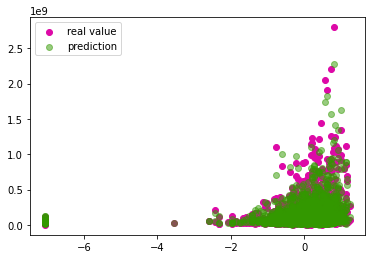

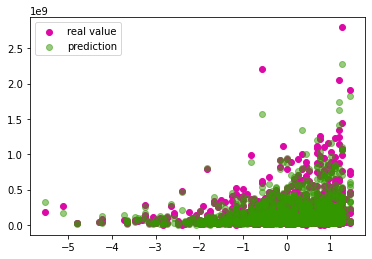

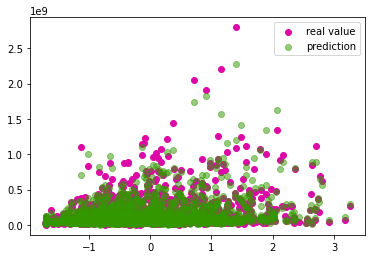

In [ ]:
for numfeat in range(16):
  plt.scatter(X_test.T[numfeat], Y_test, c = '#dd09a7', label='real value')
  plt.scatter(X_test.T[numfeat], y_pred, c = '#339900', alpha = 0.5, label = 'prediction')
  #plt.grid()
  plt.legend(loc='best')
  plt.show()

##ну стало чуть лучше кста

##Теперь попробуем предсказать без знания сборов в США

In [ ]:
data_learn2['budSqrt'] = data_learn2.apply(lambda row: math.sqrt(row['budget']), axis = 1)
data_learn2['d^2'] = data_learn2.apply(lambda row: math.pow(row['duration']-120, 2), axis = 1)
data_learn2['arc'] = data_learn2.apply(lambda row: math.asin(row['month']/12), axis = 1)
data_learn2['expIMDB'] = data_learn2.apply(lambda row: math.exp(row['rate_IMGB']), axis = 1)
data_learn2['expMeta'] = data_learn2.apply(lambda row: math.exp(row['rate_meta']), axis = 1)
data_learn2['year^2'] = data_learn2.apply(lambda row: math.pow(row['year'], 2), axis = 1)
data_learn2['rate^2'] = data_learn2.apply(lambda row: math.pow(row['rate_IMGB'] + row['rate_meta'], 2), axis = 1)
data_learn2['budvotes'] = data_learn2.apply(lambda row: math.sqrt(row['votes']), axis = 1)
data_learn2['bud^2'] = data_learn2.apply(lambda row: math.pow(row['budget'], 2), axis = 1)





data_learn2

,year,duration,rate_IMGB,rate_meta,votes,budget,month,budSqrt,d^2,arc,expIMDB,expMeta,year^2,rate^2,budvotes,bud^2
0,2015.0,138.0,7.8,80.0,930990.0,245000000.0,12.0,15652.475842,324.0,1.570796,2440.601978,5.540622e+34,4060225.0,7708.84,964.878231,6.002500e+16
1,2019.0,181.0,8.4,78.0,1126110.0,400000000.0,4.0,20000.000000,3721.0,0.339837,4447.066748,7.498417e+33,4076361.0,7464.96,1061.183302,1.600000e+17
2,2021.0,148.0,8.3,71.0,750804.0,200000000.0,12.0,14142.135624,784.0,1.570796,4023.872394,6.837671e+30,4084441.0,6288.49,866.489469,4.000000e+16
3,2009.0,162.0,7.8,83.0,1264399.0,237000000.0,12.0,15394.804318,1764.0,1.570796,2440.601978,1.112864e+36,4036081.0,8244.64,1124.454979,5.616900e+16
4,2018.0,134.0,7.3,88.0,771756.0,200000000.0,2.0,14142.135624,196.0,0.167448,1480.299928,1.651636e+38,4072324.0,9082.09,878.496443,4.000000e+16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,2018.0,124.0,6.3,60.0,51336.0,25000000.0,12.0,5000.000000,16.0,1.570796,544.571910,1.142007e+26,4072324.0,4395.69,226.574491,6.250000e+14
3993,1999.0,109.0,5.0,29.0,15541.0,15000000.0,1.0,3872.983346,121.0,0.083430,148.413159,3.931334e+12,3996001.0,1156.00,124.663547,2.250000e+14
3995,1977.0,155.0,6.6,64.0,20313.0,14000000.0,6.0,3741.657387,1225.0,0.523599,735.095189,6.235149e+27,3908529.0,4984.36,142.523682,1.960000e+14
3997,2012.0,138.0,7.1,86.0,176096.0,37500000.0,9.0,6123.724357,324.0,0.848062,1211.967074,2.235247e+37,4048144.0,8667.61,419.637939,1.406250e+15


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data_learn2, target2, test_size=0.5, random_state=0)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_test = np.array(X_test)
Y_test = np.array(Y_test)
X = np.array(X_train)
y = np.array(Y_train)

ones_train = np.ones((int(l/2), 1))
ones_test = np.ones((int(l/2), 1))
X_test = np.append(X_test, ones_test, axis=1)
X = np.append(X, ones_train, axis=1)

In [ ]:
reg = LinearRegression(fit_intercept=False).fit(X, y)
w = reg.coef_
y_pred = reg.predict(X_test)

print("err norm:", np.sqrt(np.linalg.norm(y_pred - Y_test, 2)**2/len(Y_test)))
print("score is ", reg.score(X_test, Y_test))

err norm: 143746853.711894
score is  0.6144508151606067


##Как видно из дальнейших графиков и из скора, предсказание не слишком точное :(

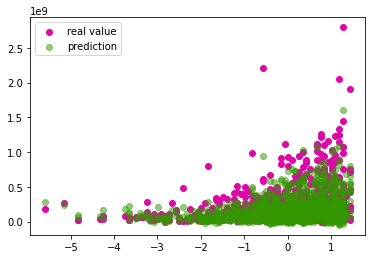

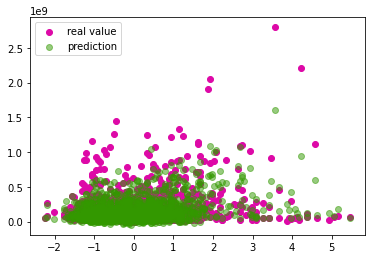

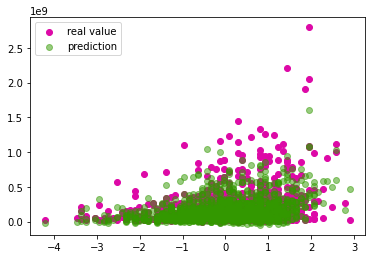

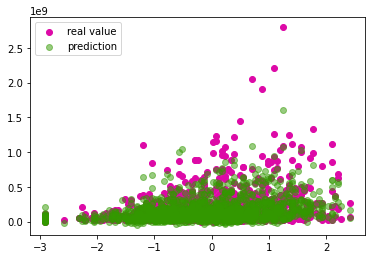

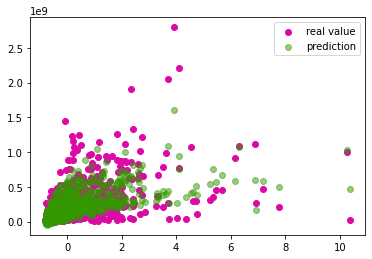

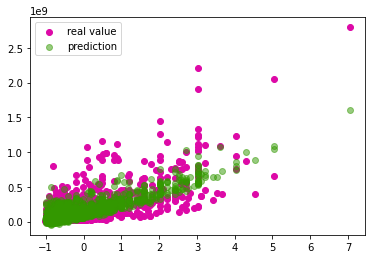

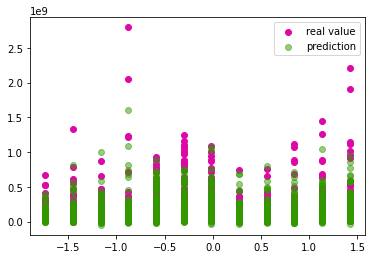

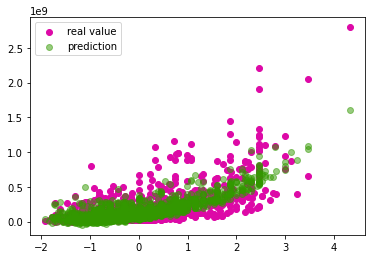

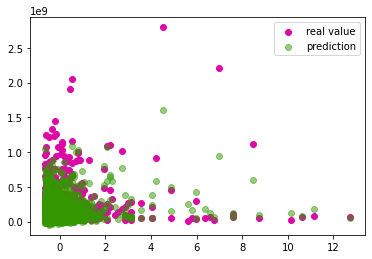

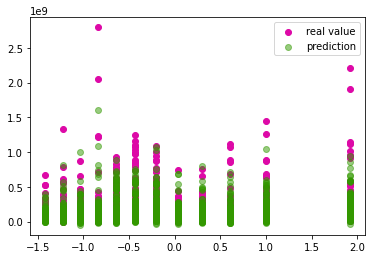

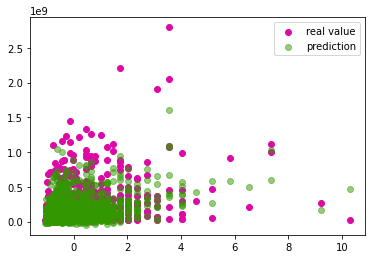

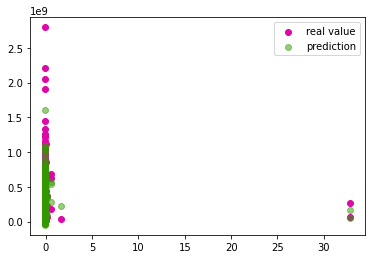

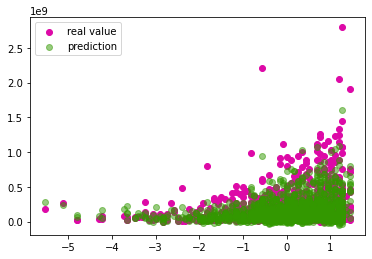

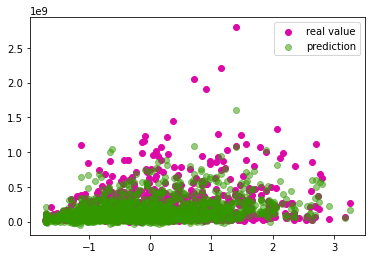

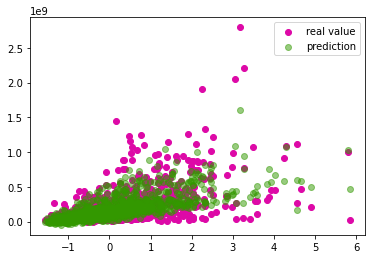

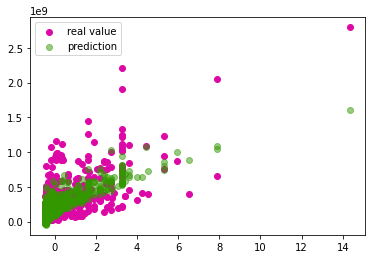

In [ ]:
for numfeat in range(16):
  plt.scatter(X_test.T[numfeat], Y_test, c = '#dd09a7', label='real value')
  plt.scatter(X_test.T[numfeat], y_pred, c = '#339900', alpha = 0.5, label = 'prediction')
  #plt.grid()
  plt.legend(loc='best')
  plt.show()

##Если бы мы не добавляли фичей, было бы совсем немножко хуже

In [ ]:
data_learn2 = deepcopy(dataset)
data_learn2 = data_learn2.drop(['Unnamed: 0', 'id', 'title', 'certificate', 'genre1', 'genre2', 'genre3', 'grosses(US)'], axis = 1)
data_learn2 = data_learn2.dropna()
target2 = data_learn2['wwGross']
data_learn2 = data_learn2.drop('wwGross', axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(data_learn2, target2, test_size=0.5, random_state=0)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_test = np.array(X_test)
Y_test = np.array(Y_test)
X = np.array(X_train)
y = np.array(Y_train)

ones_train = np.ones((int(l/2), 1))
ones_test = np.ones((int(l/2), 1))
X_test = np.append(X_test, ones_test, axis=1)
X = np.append(X, ones_train, axis=1)

reg = LinearRegression(fit_intercept=False).fit(X, y)
w = reg.coef_
y_pred = reg.predict(X_test)

print("err norm:", np.sqrt(np.linalg.norm(y_pred - Y_test, 2)**2/len(Y_test)))
print("score is ", reg.score(X_test, Y_test))

err norm: 151248635.89729536
score is  0.5731591002908919


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/movies/MovieData8k.csv')
data_learn = deepcopy(dataset)
data_learn = data_learn.drop(['Unnamed: 0', 'id', 'title', 'certificate', 'genre1', 'genre2', 'genre3'], axis = 1)
data_learn = data_learn.dropna()
dataset.loc[dataset['title'] == 'Star Wars: Episode VII - The Force Awakens', 'budget'] = 245000000
dataset.loc[dataset['title'] == 'Star Wars: Episode VII - The Force Awakens', 'wwGross'] = 2069521700
dataset.loc[dataset['title'] == 'Star Wars: Episode VII - The Force Awakens', 'month'] = 12

target = data_learn['rate_IMGB']
data_learn = data_learn.drop('rate_IMGB', axis = 1)

target = pd.DataFrame(target)
l = len(target)
n1 = 8
data_learn

,year,duration,rate_meta,votes,grosses(US),budget,wwGross,month
1,2019.0,181.0,78.0,1126110.0,858373000.0,400000000.0,2.797732e+09,4.0
2,2021.0,148.0,71.0,750804.0,804747988.0,200000000.0,1.910042e+09,12.0
3,2009.0,162.0,83.0,1264399.0,760507625.0,237000000.0,2.899384e+09,12.0
4,2018.0,134.0,88.0,771756.0,700059566.0,200000000.0,1.336494e+09,2.0
5,2018.0,149.0,68.0,1077139.0,678815482.0,300000000.0,2.048360e+09,4.0
...,...,...,...,...,...,...,...,...
3991,2018.0,124.0,60.0,51336.0,16468499.0,25000000.0,4.848175e+07,12.0
3993,1999.0,109.0,29.0,15541.0,16459004.0,15000000.0,1.826086e+07,1.0
3995,1977.0,155.0,64.0,20313.0,16400000.0,14000000.0,1.380030e+07,6.0
3997,2012.0,138.0,86.0,176096.0,16377274.0,37500000.0,5.087913e+07,9.0


In [ ]:
clf = DecisionTreeRegressor(random_state=241)
clf.fit(data_learn, target)
importances = clf.feature_importances_
importances = importances*100
print('Вклад признаков в построение прогноза')
for i in range (0,8):
  print(i, ' - ' ,"%.2f" %  importances[i], '%')

Вклад признаков в построение прогноза
0  -  3.83 %
1  -  7.54 %
2  -  57.60 %
3  -  16.92 %
4  -  3.04 %
5  -  5.04 %
6  -  3.61 %
7  -  2.41 %


,year,duration,rate_meta,votes,grosses(US),budget,wwGross,month
year,1.000000,-0.145478,-0.112643,0.068173,0.120877,0.291568,0.191830,-0.099135
duration,-0.145478,1.000000,0.305514,0.341436,0.220485,0.242933,0.231929,0.198560
rate_meta,-0.112643,0.305514,1.000000,0.416533,0.254122,0.033233,0.205094,0.207782
votes,0.068173,0.341436,0.416533,1.000000,0.556830,0.330330,0.537267,0.074403
grosses(US),0.120877,0.220485,0.254122,0.556830,1.000000,0.557028,0.899272,0.035543
budget,0.291568,0.242933,0.033233,0.330330,0.557028,1.000000,0.683866,0.019681
wwGross,0.191830,0.231929,0.205094,0.537267,0.899272,0.683866,1.000000,0.031244
month,-0.099135,0.198560,0.207782,0.074403,0.035543,0.019681,0.031244,1.000000


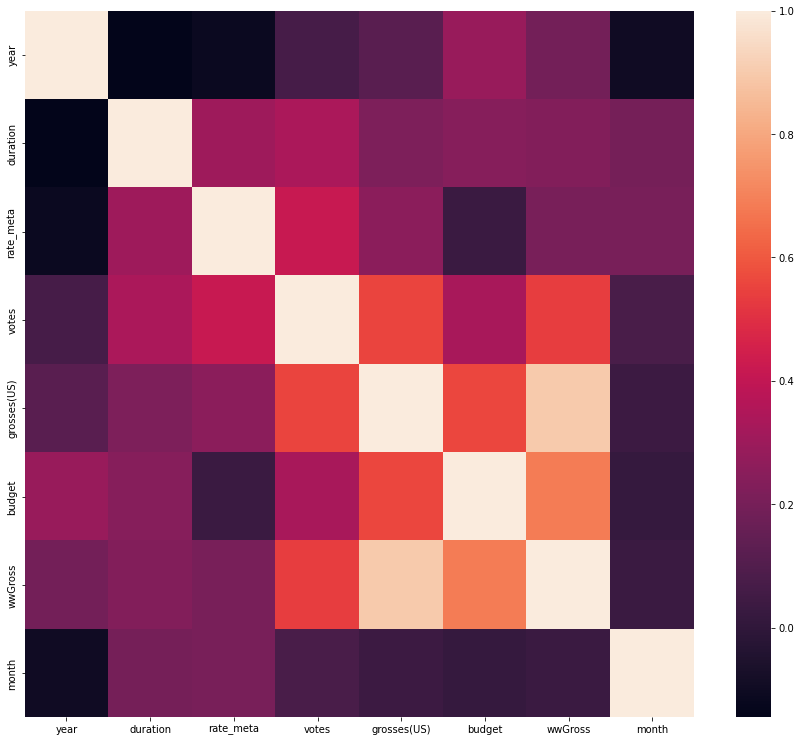

In [ ]:
matrix = data_learn.corr(method='pearson')
plt.figure(figsize=(15,13))
sns.heatmap(matrix, annot=False)
matrix

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data_learn, target, test_size=0.3, random_state=0)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_test = np.array(X_test)
Y_test = np.array(Y_test)
X = np.array(X_train)
y = np.array(Y_train)

ones_train = np.ones((1924, 1))
ones_test = np.ones((825, 1))
X_test = np.append(X_test, ones_test, axis=1)
X = np.append(X, ones_train, axis=1) 

In [ ]:
reg = LinearRegression(fit_intercept=False).fit(X, y)
w = reg.coef_
y_pred = reg.predict(X_test)

print("err norm:", np.sqrt(np.linalg.norm(y_pred - Y_test, 2)**2/len(Y_test)))
print("score is ", reg.score(X_test, Y_test))

err norm: 0.5851104503804258
score is  0.6555113051060335


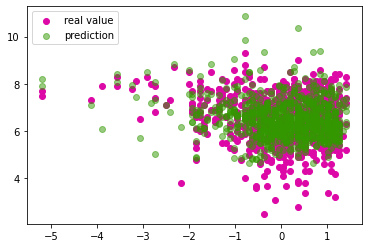

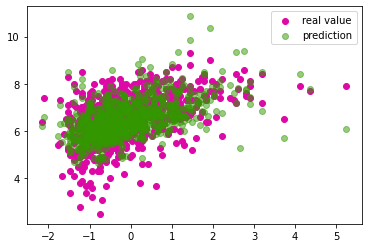

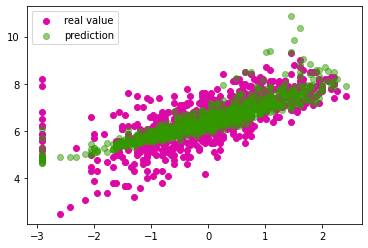

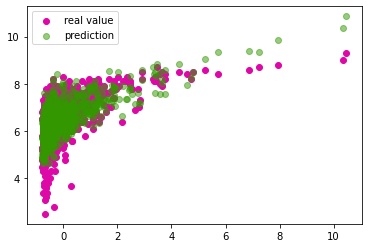

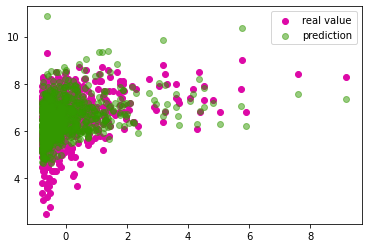

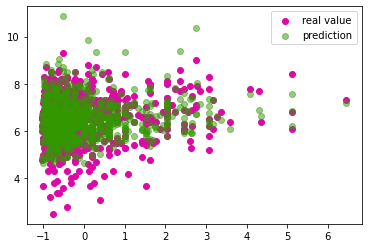

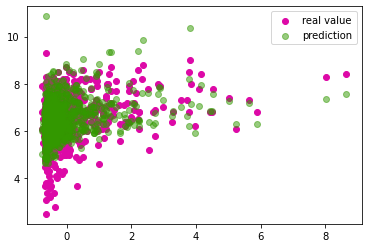

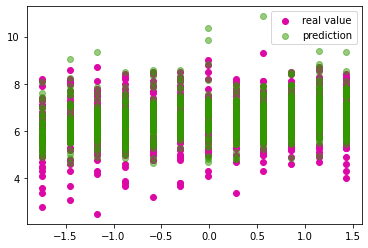

In [ ]:
for numfeat in range(8):
  plt.scatter(X_test.T[numfeat], Y_test, c = '#dd09a7', label='real value')
  plt.scatter(X_test.T[numfeat], y_pred, c = '#339900', alpha = 0.5, label = 'prediction')
  #plt.grid()
  plt.legend(loc='best')
  plt.show()

In [ ]:
data_learn['budSqrt'] = data_learn.apply(lambda row: math.sqrt(row['budget']), axis = 1)
data_learn['d^2'] = data_learn.apply(lambda row: math.pow(row['duration']-120, 2), axis = 1)
data_learn['loggros'] = data_learn.apply(lambda row: math.log(row['grosses(US)']), axis = 1)
data_learn['arc'] = data_learn.apply(lambda row: math.asin(row['month']/12), axis = 1)
data_learn['logMeta'] = data_learn.apply(lambda row: math.log(row['rate_meta']+1), axis = 1)
data_learn['year^2'] = data_learn.apply(lambda row: math.pow(row['year'], 2), axis = 1)
data_learn['meta^2'] = data_learn.apply(lambda row: math.pow(row['rate_meta'], 2), axis = 1)
data_learn['grossSqrt'] = data_learn.apply(lambda row: math.sqrt(row['wwGross']), axis = 1)
data_learn['Bud^2'] = data_learn.apply(lambda row: math.pow(row['budget'], 2), axis = 1)






data_learn

,year,duration,rate_meta,votes,grosses(US),budget,wwGross,month,budSqrt,d^2,loggros,arc,logMeta,year^2,meta^2,grossSqrt,Bud^2
1,2019.0,181.0,78.0,1126110.0,858373000.0,400000000.0,2.797732e+09,4.0,20000.000000,3721.0,20.570549,0.339837,4.369448,4076361.0,6084.0,52893.591795,1.600000e+17
2,2021.0,148.0,71.0,750804.0,804747988.0,200000000.0,1.910042e+09,12.0,14142.135624,784.0,20.506040,1.570796,4.276666,4084441.0,5041.0,43704.022492,4.000000e+16
3,2009.0,162.0,83.0,1264399.0,760507625.0,237000000.0,2.899384e+09,12.0,15394.804318,1764.0,20.449497,1.570796,4.430817,4036081.0,6889.0,53845.929298,5.616900e+16
4,2018.0,134.0,88.0,771756.0,700059566.0,200000000.0,1.336494e+09,2.0,14142.135624,196.0,20.366676,0.167448,4.488636,4072324.0,7744.0,36558.095136,4.000000e+16
5,2018.0,149.0,68.0,1077139.0,678815482.0,300000000.0,2.048360e+09,4.0,17320.508076,841.0,20.335860,0.339837,4.234107,4072324.0,4624.0,45258.808579,9.000000e+16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,2018.0,124.0,60.0,51336.0,16468499.0,25000000.0,4.848175e+07,12.0,5000.000000,16.0,16.616960,1.570796,4.110874,4072324.0,3600.0,6962.884029,6.250000e+14
3993,1999.0,109.0,29.0,15541.0,16459004.0,15000000.0,1.826086e+07,1.0,3872.983346,121.0,16.616383,0.083430,3.401197,3996001.0,841.0,4273.273336,2.250000e+14
3995,1977.0,155.0,64.0,20313.0,16400000.0,14000000.0,1.380030e+07,6.0,3741.657387,1225.0,16.612792,0.523599,4.174387,3908529.0,4096.0,3714.875772,1.960000e+14
3997,2012.0,138.0,86.0,176096.0,16377274.0,37500000.0,5.087913e+07,9.0,6123.724357,324.0,16.611405,0.848062,4.465908,4048144.0,7396.0,7132.960886,1.406250e+15


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data_learn, target, test_size=0.3, random_state=0)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_test = np.array(X_test)
Y_test = np.array(Y_test)
X = np.array(X_train)
y = np.array(Y_train)

ones_train = np.ones((1924, 1))
ones_test = np.ones((825, 1))
X_test = np.append(X_test, ones_test, axis=1)
X = np.append(X, ones_train, axis=1) 

In [ ]:
reg = LinearRegression(fit_intercept=False).fit(X, y)
w = reg.coef_
y_pred = reg.predict(X_test)

print("err norm:", np.sqrt(np.linalg.norm(y_pred - Y_test, 2)**2/len(Y_test)))
print("score is ", reg.score(X_test, Y_test))

err norm: 0.554002326085501
score is  0.6911678955696954


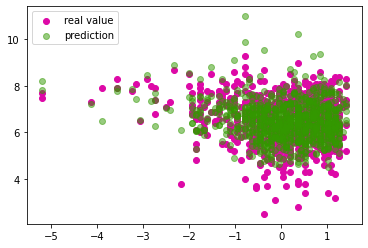

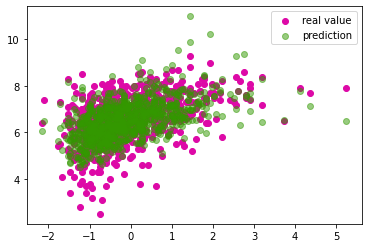

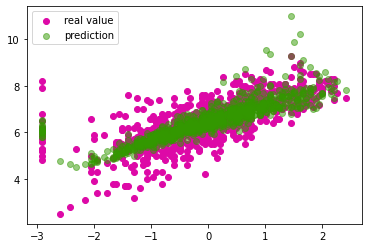

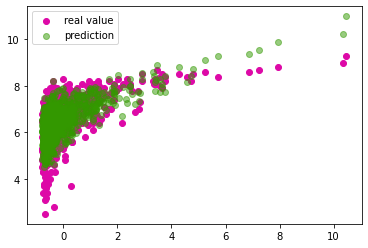

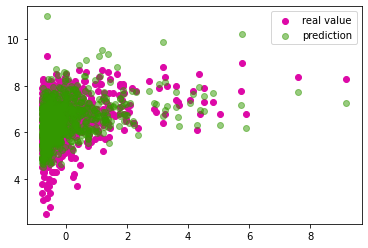

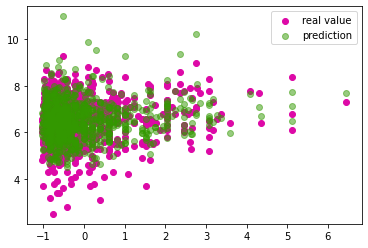

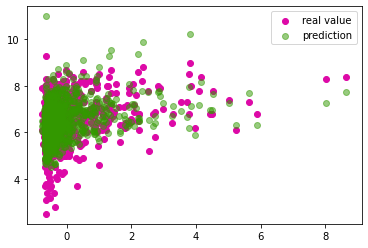

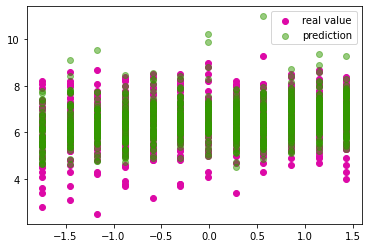

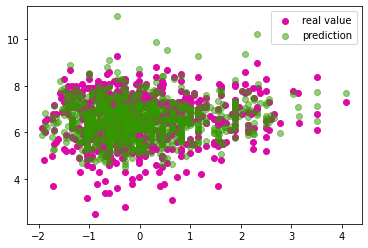

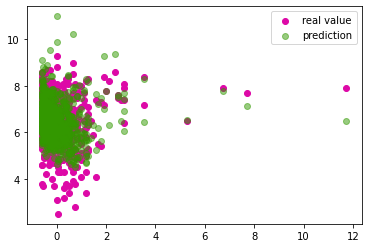

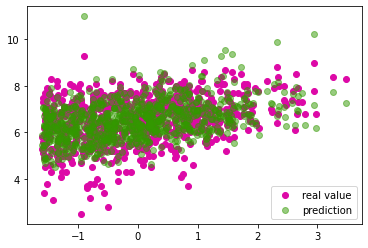

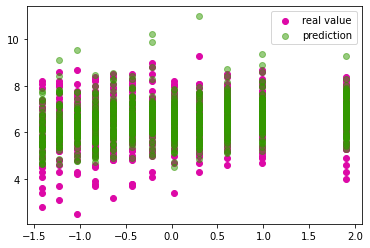

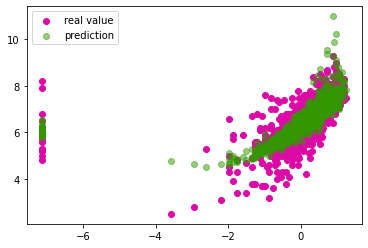

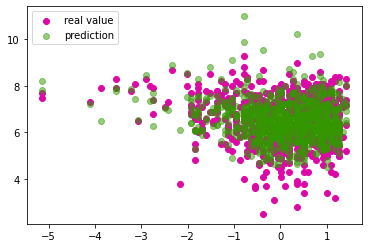

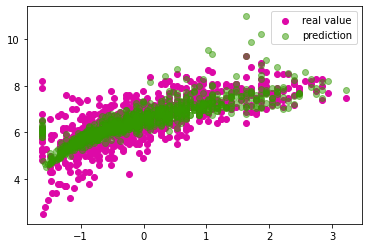

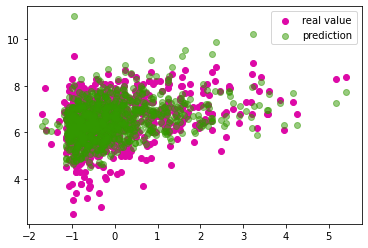

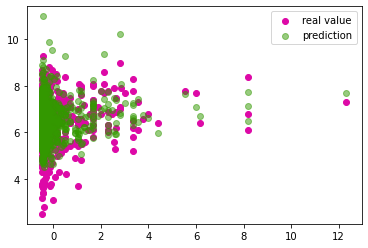

In [ ]:
for numfeat in range(17):
  plt.scatter(X_test.T[numfeat], Y_test, c = '#dd09a7', label='real value')
  plt.scatter(X_test.T[numfeat], y_pred, c = '#339900', alpha = 0.5, label = 'prediction')
  #plt.grid()
  plt.legend(loc='best')
  plt.show()

###Выводы:
1) На основе всех имеющихся данных линейная регрессия предсказывает мировые сборы со скором 0.88 (с FG 0.89)

2) Без данных о сборах в США мировые сборы предсказываются со скором 0.57 (c FG 0.61)

3) Оценка на IMDB предсказывается со скором 0.66 (с FG 0.69)

Скорее всего линейная регрессия не лучший метод для этой задачи, как видно из графиков, данные слишком разнообразны и нет чётких зависимостей, предсказываемые же данные выглядят менее пушисто, что свидетельствует о недообучении